In [6]:
import netplotbrain
import pandas as pd
import nibabel as nib
import numpy as np

In [13]:
nodes_cifti='resources/atlas/atlas-schaefer_dseg.tsv'
parcels = nib.load(nodes_cifti).header.get_axis(1).name

#parcels = nib.load(

ImageFileError: Cannot work out file type of "resources/atlas/atlas-schaefer_dseg.tsv"

In [8]:
import re

pattern=r'[^_]+_[^_]+_([^_]+)'
        
    
labels = [re.search(pattern,parcel)[1] for parcel in parcels]

idx_to_labels = {idx:re.search(pattern,parcel)[1] for idx,parcel in enumerate(parcels)}


    

NameError: name 'parcels' is not defined

In [14]:
#try plotting our data

nodes_cifti='resources/atlas/atlas-schaefer_nodes.pscalar.nii'
struc_edges_cifti='results/LOBE/sub-007/dwi/sub-007_den-32k_atlas-schaefer_struc.pconn.nii'
func_edges_cifti='results/LOBE/sub-007/func/sub-007_task-rest_den-32k_desc-preproc_denoise-24HMP8PhysSpikeReg_fwhm-5_atlas-schaefer_bold.pconn.nii'
template='MNI152NLin6Asym' #closest to fsLR surfs

nodes = nib.load(nodes_cifti).get_fdata()
func_edges = nib.load(func_edges_cifti).get_fdata()
struc_edges = nib.load(struc_edges_cifti).get_fdata()

func_degree=np.abs(func_edges).sum(axis=0)

#create dataframe for nodes, node coloring
nodes_df = pd.DataFrame({'x':nodes[0,:],'y':nodes[1,:],'z':nodes[2,:],'network':labels,'degree':func_degree})

FileNotFoundError: No such file or no access: 'resources/atlas/atlas-schaefer_nodes.pscalar.nii'

In [15]:
netplotbrain.plot(nodes=nodes_df,
                  edges=struc_edges,
                  template=template,
                  node_color='network',
                  node_size='degree',
                  node_sizevminvmax='minmax',
                  view='LSc', # 'Sc' - superior, connectivity
                  #view='LSs', # Left Superior spring
                  edge_thresholddirection='above',
                  edge_threshold=0.9,
                  edge_widthscale=0.3)

NameError: name 'nodes_df' is not defined

In [119]:
# try out nichord here

from nichord.chord import plot_chord
from nichord.convert import convert_matrix

chord_edges,chord_edge_weights = convert_matrix(edges)
plot_chord(idx_to_label=idx_to_labels,edges=chord_edges,
           edge_weights=chord_edge_weights,
           fp_chord='plot_chord.png')


<Figure size 1500x1500 with 0 Axes>

In [131]:
from nichord.glassbrain import plot_glassbrain

chord_coords = [nodes[:,i] for i in range(nodes.shape[1])]

plot_glassbrain(idx_to_label=idx_to_labels,edges=chord_edges,
           edge_weights=chord_edge_weights,
           coords=chord_coords,
           fp_glass='plot_glassbrain.png')

(<Figure size 300x300 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

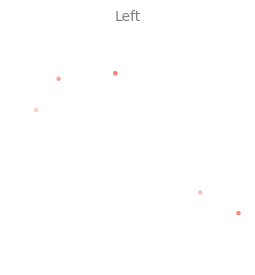

In [8]:
# Define the nodes
nodes_df = pd.DataFrame({'x': [40, 10, 30, -15, -25], 
                         'y': [50, 40, -10, -20, 20], 
                         'z': [20, 30, -10, -15, 30]})
# Call netplotbrain to plot
netplotbrain.plot(nodes=nodes_df,arrowaxis=None)

(<Figure size 300x400 with 3 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >, <Axes: >])

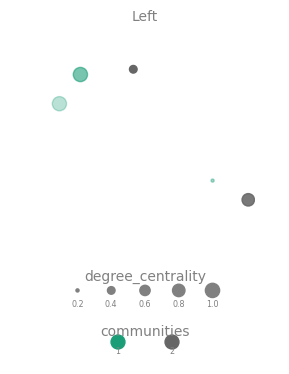

In [9]:
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    node_size='degree_centrality',
    node_color='communities',
    arrowaxis=None,
    node_scale=100)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 479k/479k [00:00<00:00, 803kB/s]


(<Figure size 300x300 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

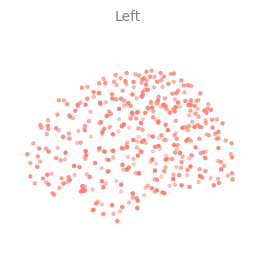

In [10]:
# Define the atlas by key value words of TemplateFlow name
nodes={'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
         'desc': '400Parcels7Networks',
         'resolution': 1}
## Template (nifti or string)
netplotbrain.plot(
    nodes=nodes,
    arrowaxis=None)     

(<Figure size 300x350 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

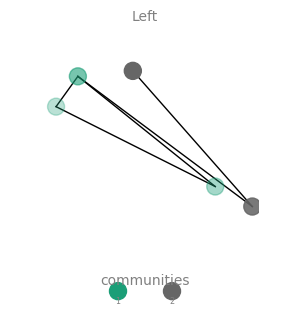

In [11]:
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Define the edges 
edges_df = pd.DataFrame(data={'i': [0, 0, 1, 1, 3], 
                              'j': [1, 2, 2, 3, 4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    edges=edges_df,
    node_color='communities',
    arrowaxis=None,
    node_scale=150)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 3.29M/3.29M [00:00<00:00, 18.3MB/s]


(<Figure size 300x300 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

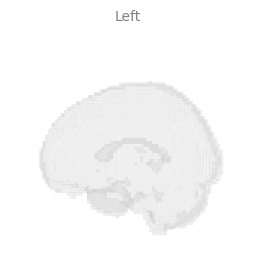

In [13]:
#increasing voxelsize
netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='filled',
    template_voxelsize=3,
    arrowaxis=None)
#renders in ca 24 seconds 

# However, note that an excessive increase of voxelsize can degrade spatial resolution.  

(<Figure size 300x300 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

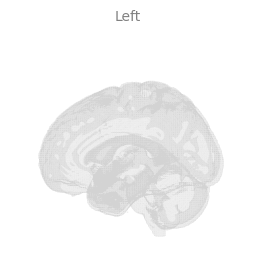

In [18]:
# further increasing voxelsize
netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='surface',
    arrowaxis=None)
    
# renders in ca. 3 seconds 